# Insertion Sort — Step‑by‑Step + Animation (Beginner Friendly)

Welcome! This notebook mirrors the style and flow of the **Merge Sort** notebook, but teaches **Insertion Sort**.
You will:
1. **See** what Insertion Sort does (Quick Start animation).
2. **Understand** the idea with plain English & pseudocode.
3. **Trace** the algorithm step‑by‑step with **printouts**.
4. **Animate** it smoothly, with ready‑to‑run code.
5. Try small **practice** tweaks at the end.

# 🔴
## 0) Quick Start — Run these two cells to see Insertion Sort in action
If you're in a hurry, **just run these two cells**. Then come back to learn *why* it works.

- The bars represent the list's values.
- Each frame shows the array after **a single write** during insertion (a shift or final placement).
- We silence the Matplotlib generator caching warning by setting `cache_frame_data=False`.

In [1]:
# Quick Start: imports
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


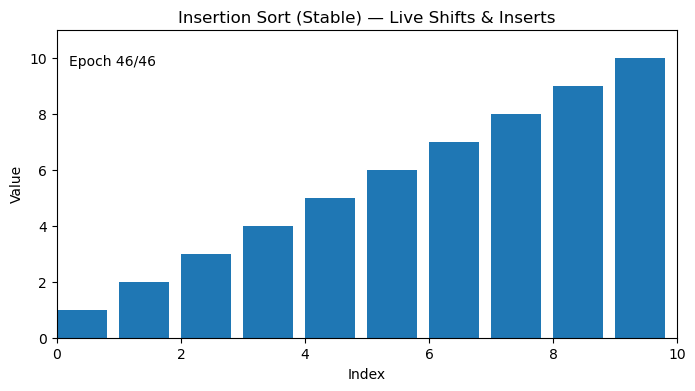

In [2]:
# Quick Start: stable, animation-friendly Insertion Sort (yields snapshots)
def insertion_sort_snapshots(array):
    yield array[:]                 # initial state
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        while j >= 0 and array[j] > key:
            array[j + 1] = array[j]
            j -= 1
            yield array[:]         # after each shift
        array[j + 1] = key
        yield array[:]             # after placing key

# Animate it (warning-free streaming)
N = 10
random.seed(1)
data = list(range(1, N + 1))
random.shuffle(data)

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(range(len(data)), data, align='edge')
ax.set_xlim(0, len(data))
ax.set_ylim(0, max(data) * 1.1)
ax.set_title("Insertion Sort (Stable) — Live Shifts & Inserts")
ax.set_xlabel("Index")
ax.set_ylabel("Value")

frames = list(insertion_sort_snapshots(data[:]))
total_frames = len(frames)
epoch_text = ax.text(0.02, 0.92, "", transform=ax.transAxes, ha="left", va="top")
frames_with_idx = [(i, f) for i, f in enumerate(frames, start=1)]

def update(tup):
    i, frame = tup  # i is 1-based epoch number
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    epoch_text.set_text(f"Epoch {i}/{total_frames}")
    return bars.patches + [epoch_text]   # include text when blitting

anim = FuncAnimation(
    fig, update,
    frames=frames_with_idx,              # list prevents pre-consumption issues
    interval=30, blit=True, repeat=False,
    cache_frame_data=False
)

HTML(anim.to_jshtml())

## 1) The idea of Insertion Sort (plain English)

- We **grow a sorted prefix** of the array from left to right.
- For each position `i`, we take the **key** = `A[i]` and **scan left** to find where it belongs.
- While scanning, we **shift** larger elements one position to the **right** to make room.
- We then **insert** the key into that hole. The left part stays sorted after every pass.
- **Stable?** Yes — equal items keep their original order because we only shift when `A[j] > key` (strictly greater).
- **Time:** Worst/average \(O(n^2)\); **Space:** \(O(1)\) extra; **Best case:** nearly sorted data gives \(O(n)\) shifts.

In [7]:
from IPython.display import Video

# Local file in same folder as the notebook
Video("insertion_sort_demo.mp4", embed=True)               # embed=True keeps it inside the .ipynb

### Pseudocode

```text
# Assumptions
# - A is a 0-based indexable array/list.
# - We sort A[0..n-1] in ascending order.

procedure insertion_sort(A):
  n ← length(A)
  for i from 1 to n−1 do:
    key ← A[i]
    j ← i − 1

    # Shift strictly larger elements to the right
    while j ≥ 0 and A[j] > key do:
      A[j+1] ← A[j]
      j ← j − 1

    # Insert key in the "hole" that remains
    A[j+1] ← key
```

- Using `>` (not `>=`) keeps the algorithm **stable**.

In [3]:
from IPython.display import Video
from pathlib import Path

# If you have a local demo video next to this notebook, it will embed here.
video_path = Path("insertion_sort_demo.mp4")
if video_path.exists():
    Video(str(video_path), embed=True)     # stays inside the .ipynb
else:
    print("Optional video not found (insertion_sort_demo.mp4). Skipping embed.")


Optional video not found (insertion_sort_demo.mp4). Skipping embed.


## 2) Guided Trace — see every step with printouts

Run the next two cells and watch the console.  
This version is **unconditionally verbose** to maximize clarity.

In [4]:
def insertion_sort_trace(array):
    print(f"Original: {array}")
    n = len(array)
    # We'll yield after each write so that you could animate this too if you want.
    for i in range(1, n):
        key = array[i]
        print(f"\n[i={i}] key={key} — grow sorted prefix A[0..{i-1}] -> insert key")
        j = i - 1
        # Shift larger elements to the right
        while j >= 0 and array[j] > key:
            print(f"  compare A[{j}]={array[j]} > key={key} -> shift right to A[{j+1}]")
            array[j + 1] = array[j]
            j -= 1
            yield array[:]
        # Place key
        print(f"  place key at A[{j+1}] <- {key}")
        array[j + 1] = key
        yield array[:]
        print(f"  array now: {array}")


In [5]:
# Try the trace on a tiny list so the output is readable
data = [5, 2, 4, 3]
for _ in insertion_sort_trace(data):
    pass
print("Sorted:  ", data)


Original: [5, 2, 4, 3]

[i=1] key=2 — grow sorted prefix A[0..0] -> insert key
  compare A[0]=5 > key=2 -> shift right to A[1]
  place key at A[0] <- 2
  array now: [2, 5, 4, 3]

[i=2] key=4 — grow sorted prefix A[0..1] -> insert key
  compare A[1]=5 > key=4 -> shift right to A[2]
  place key at A[1] <- 4
  array now: [2, 4, 5, 3]

[i=3] key=3 — grow sorted prefix A[0..2] -> insert key
  compare A[2]=5 > key=3 -> shift right to A[3]
  compare A[1]=4 > key=3 -> shift right to A[2]
  place key at A[1] <- 3
  array now: [2, 3, 4, 5]
Sorted:   [2, 3, 4, 5]


## 3) Friendly Animation — tweak size & speed

- `N` : number of bars (try 10, 20, 40).  
- `interval`: delay (ms) between frames (larger = slower).  
- We silence the Matplotlib generator caching warning by setting `cache_frame_data=False` for generator-based frames.

### Optional: Precompute frames (uses more memory but has a known length)

If your machine is fast enough or `N` is small, you can precompute frames for easier scrubbing/saving:

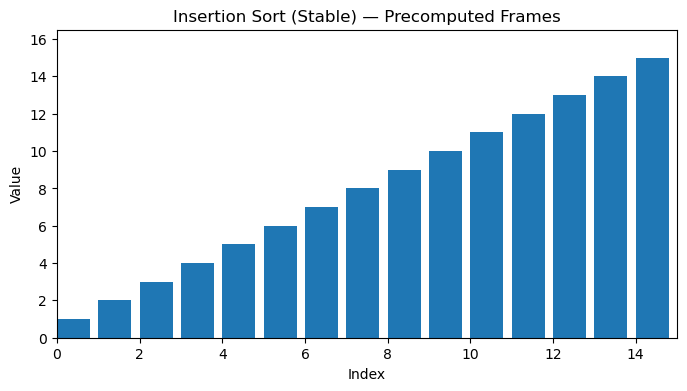

In [6]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def insertion_sort_collect_frames(array):
    frames = [array[:]]  # include starting state if desired
    for i in range(1, len(array)):
        key = array[i]
        j = i - 1
        while j >= 0 and array[j] > key:
            array[j + 1] = array[j]
            j -= 1
            frames.append(array[:])
        array[j + 1] = key
        frames.append(array[:])
    return frames

N = 15
random.seed(3)
data = list(range(1, N + 1))
random.shuffle(data)

frames_list = insertion_sort_collect_frames(data[:])  # work on a copy

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(range(len(frames_list[0])), frames_list[0], align='edge')
ax.set_xlim(0, len(frames_list[0]))
ax.set_ylim(0, max(frames_list[0]) * 1.1)
ax.set_title("Insertion Sort (Stable) — Precomputed Frames")
ax.set_xlabel("Index")
ax.set_ylabel("Value")

def update(frame):
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    return bars

anim = FuncAnimation(fig, update, frames=frames_list, interval=200, blit=True, repeat=False)
HTML(anim.to_jshtml())


## 🔴 4) Practice — Your turn

- Change `N`, `interval`, or `seed` and re-run the animation cell(s).
- Modify the algorithm to sort **descending** (hint: flip the comparison).